# Sebastian Garcia

# Part 1: Regression with Gradient Descents

Perform regression with gradient descent and stochastic gradient descent on salary data and compare results to standard regression in sklearn.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt


In [2]:
# Load the data
salary = pd.read_csv('Salary_Data.csv')
salary.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Select Years of Experience column as X (independent variable)
sx = salary.iloc[:, 0]
sx[:5]


0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [4]:
# Select Salary column as Y (dependent variable)
sy = salary.iloc[:, 1]
sy[:5]


0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

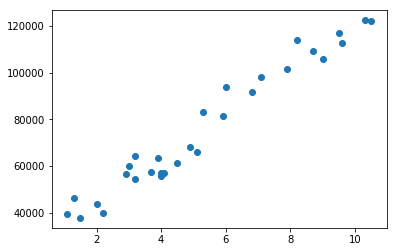

In [5]:
# Checking the data
plt.scatter(sx, sy)
plt.show()


## Regression with Gradient Descent

In [6]:
# Building the model

W = np.random.uniform(high=0.5, low=-0.5)  # Slope (W)
b = np.random.uniform(high=0.5, low=-0.5)  # Intercept (b)

L = 0.001  # Learning Rate
epochs = 1000  # Number of iterations

n = float(len(sx))  # Number of elements in the X's variables

for epoch in range(epochs):
    #if epoch%100 == 0:
        #print(epoch)

    for i in range(len(sx)):
        sy_pred = W*sx + b  # Predict value of Y with the X's variables
        d_W = (-2/n) * sum(sx * (sy - sy_pred))  # Partial derivative with respect to W
        d_b = (-2/n) * sum(sy - sy_pred)  # Partial derivative with respect to b
        W = W - L*d_W  # Update the value of W
        b = b - L*d_b  # Update the value of b

# With each iteration, as the accuracy increases, the error of the difference
# between the actual y and the predicted y will get smaller.
# Which means, the values of W and b will also be updated accordingly.

print(W, b)


9449.973190685818 25792.12695380759


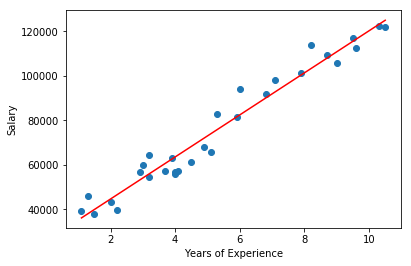

In [7]:
# Making predictions
sy_pred = W*sx + b

plt.scatter(sx, sy)
plt.plot(sx, sy_pred, color="red")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [8]:
rmse_data = np.sqrt(mean_squared_error(sy, sy_pred))
print("RMSE for the model is {}".format(rmse_data))


RMSE for the model is 5592.043608864359


## Regression with Stochastic Gradient Descent

In [9]:
# Building the model

Ws = np.random.uniform(high=0.5, low=-0.5)  # Slope (W)
bs = np.random.uniform(high=0.5, low=-0.5)  # Intercept (b)

Ls = 0.001  # Learning Rate
epochs_s = 1000  # Number of iterations

for epoch in range(epochs_s):
    #if epoch%100 == 0:
        #print(epoch)
    for i in range(len(sx)):
        sys_pred = Ws*sx[i] + bs  # Predict value of Y with the X's variables
        d_Ws = (-2) * (sx[i] * (sy[i] - sys_pred))  # Partial derivative with respect to Ws
        d_bs = (-2) * (sy[i] - sys_pred)  # Partial derivative with respect to bs
        Ws = Ws - Ls*d_Ws  # Update the value of Ws
        bs = bs - Ls*d_bs  # Update the value of bs

# With each iteration, as the accuracy increases,
# the error of the diffference between the actual y and the predicted y will get smaller.
# Which means, the values of W and b will also be updated accordingly.

print(Ws, bs)


9287.564505393311 26512.8747762898


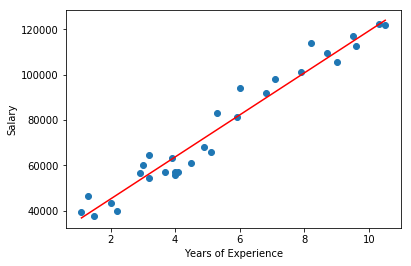

In [10]:
# Making predictions
sys_pred = Ws*sx + bs

plt.scatter(sx, sy)
#plt.scatter(sx, sys_pred)
plt.plot(sx, sys_pred, color="red")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [11]:
rmse_sge = np.sqrt(mean_squared_error(sy, sys_pred))
print("RMSE for the model is {}".format(rmse_sge))


RMSE for the model is 5612.173431292579


In [12]:
# RMSE of test set for simple linear regression is 6146.92.
# RMSE for Regression with Gradient Descent is 5592.04.
# RMSE for Regression with Stochastic Gradient Descent is 5612.17.
# Therefore, Regression with Gradient Descent is the best model in this case.